In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 1. Compute Sobel derivatives in X and Y directions and visualize gradient magnitude

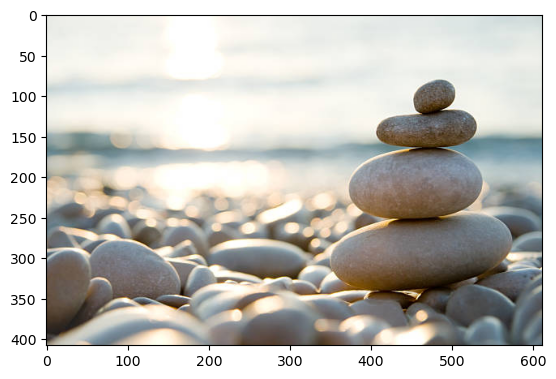

In [2]:
img1 = cv2.imread('img1.jpg',1)
img1=img1[...,::-1]
plt.imshow(img1)

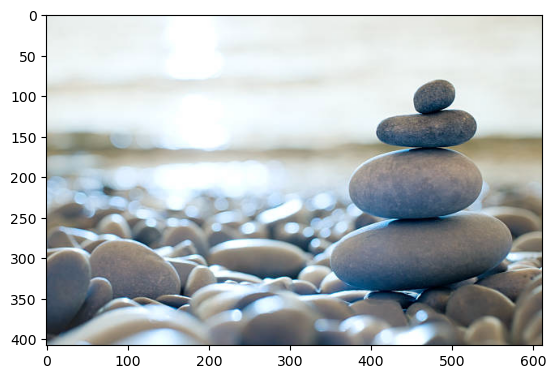

In [3]:
img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

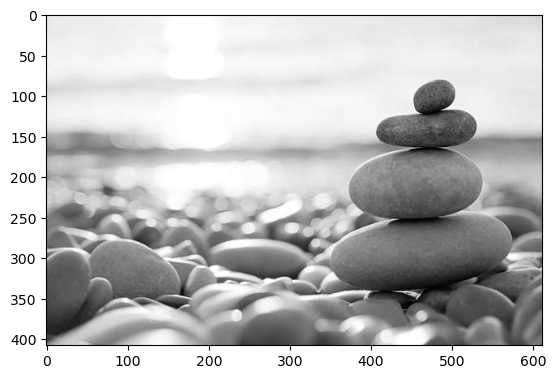

In [4]:
img3 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img3, cmap="gray")

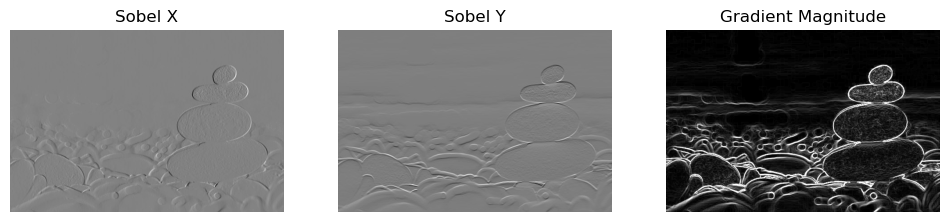

In [5]:
# Compute Sobel gradients
sobel_x = cv2.Sobel(img3, cv2.CV_64F, 1, 0, ksize=3)  # Sobel X
sobel_y = cv2.Sobel(img3, cv2.CV_64F, 0, 1, ksize=3)  # Sobel Y

# Compute the gradient magnitude
gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Normalize the gradient magnitude for visualization
# gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)
# gradient_magnitude = np.uint8(gradient_magnitude)  # Convert to uint8 for display
gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

# Plot the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Sobel X")
plt.imshow(sobel_x, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Sobel Y")
plt.imshow(sobel_y, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Gradient Magnitude")
plt.imshow(gradient_magnitude, cmap="gray")
plt.axis("off")

plt.show()

# 2. Apply Sobel on noisy images and analyze its performance. Use Gaussian filtering before Sobel for noise reduction. Compare the result.

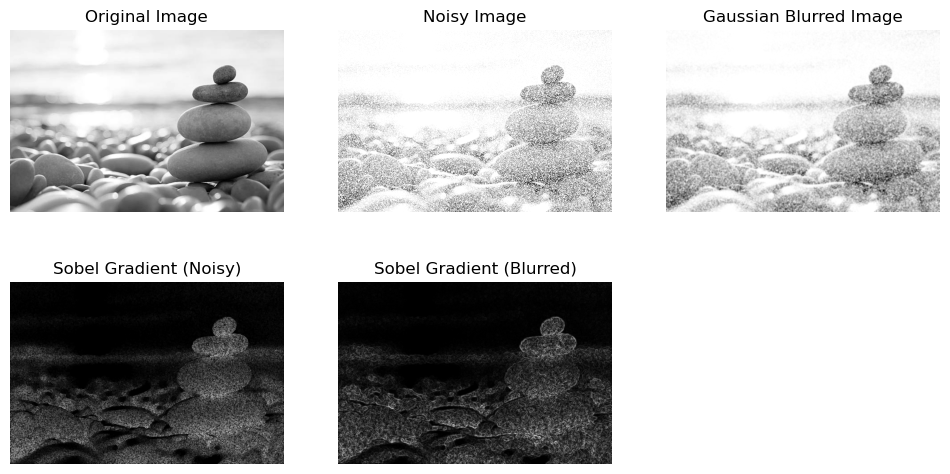

In [6]:
# Add Gaussian noise to the image
mean = 0
sigma = 36  # Standard deviation of noise
noise = np.random.normal(mean, sigma, img3.shape).astype(np.uint8)
noisy_image = cv2.add(img3, noise)  # Add noise to image

# Apply Sobel on Noisy Image
sobel_x_noisy = cv2.Sobel(noisy_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_noisy = cv2.Sobel(noisy_image, cv2.CV_64F, 0, 1, ksize=3)
gradient_magnitude_noisy = cv2.magnitude(sobel_x_noisy, sobel_y_noisy)
gradient_magnitude_noisy = cv2.normalize(gradient_magnitude_noisy, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Apply Gaussian filtering before Sobel
blurred_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)

# Apply Sobel on Blurred Image
sobel_x_blurred = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_blurred = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)
gradient_magnitude_blurred = cv2.magnitude(sobel_x_blurred, sobel_y_blurred)
gradient_magnitude_blurred = cv2.normalize(gradient_magnitude_blurred, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(img3, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.title("Gaussian Blurred Image")
plt.imshow(blurred_image, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.title("Sobel Gradient (Noisy)")
plt.imshow(gradient_magnitude_noisy, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.title("Sobel Gradient (Blurred)")
plt.imshow(gradient_magnitude_blurred, cmap="gray")
plt.axis("off")

plt.show()


# 3. Compute 2D Fourier Transform (FFT) of an image and display magnitude of the frequency spectrum.

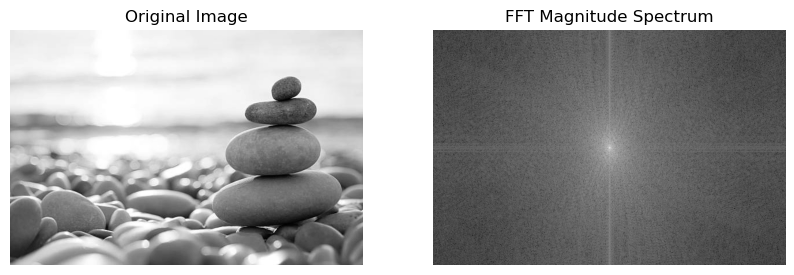

In [7]:
# Compute 2D Fast Fourier Transform (FFT)
fft_image = np.fft.fft2(img3)

# Shift the zero frequency component to the center
fft_shifted = np.fft.fftshift(fft_image)

# Compute magnitude spectrum
magnitude_spectrum = np.log(1 + np.abs(fft_shifted))  # Log scaling for better visualization

# Plot original image and its frequency spectrum
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img3, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("FFT Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap="gray")
plt.axis("off")

plt.show()


## Inverse Fourier transform

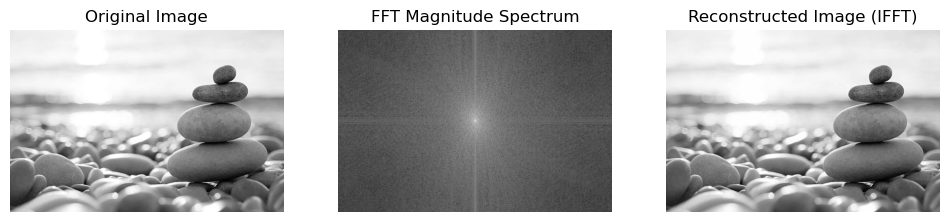

In [8]:
# Perform inverse shift
ifft_shifted = np.fft.ifftshift(fft_shifted)

# Apply Inverse FFT
reconstructed_image = np.fft.ifft2(ifft_shifted)
reconstructed_image = np.abs(reconstructed_image)  # Convert complex values to real values

# Normalize for display
reconstructed_image = cv2.normalize(reconstructed_image, None, 0, 255, cv2.NORM_MINMAX)
reconstructed_image = np.uint8(reconstructed_image)

# Plot original, magnitude spectrum, and reconstructed image
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img3, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("FFT Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Reconstructed Image (IFFT)")
plt.imshow(reconstructed_image, cmap="gray")
plt.axis("off")

plt.show()

# 4. Apply the Standard Hough Transform to detect straight lines. Adjust thresholds and parameters for better results.

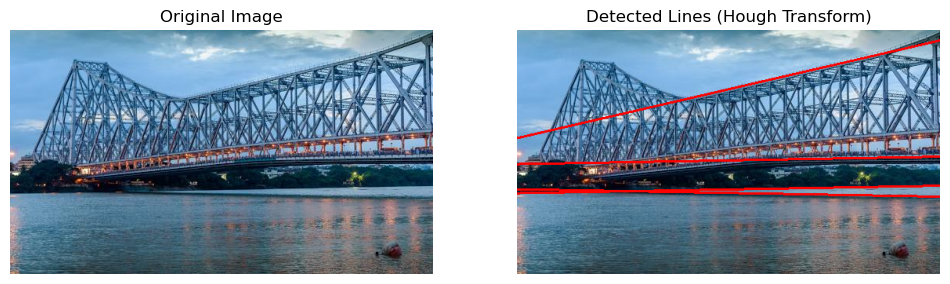

In [12]:
# Load the image in grayscale
image = cv2.imread("bridge.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Standard Hough Transform
rho = 1            # Distance resolution in pixels
theta = np.pi / 180  # Angle resolution in radians
threshold = 250    # Minimum number of votes to consider a line

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150)

lines = cv2.HoughLines(edges, rho, theta, threshold)

# Draw detected lines on the original image
output = image.copy()
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))  # Extend the line
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(output, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(color)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Detected Lines (Hough Transform)")
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()

# 5. Apply Canny edge detection algorithm. Adjust thresholds and parameters for better results. Use Trackbar if you can.

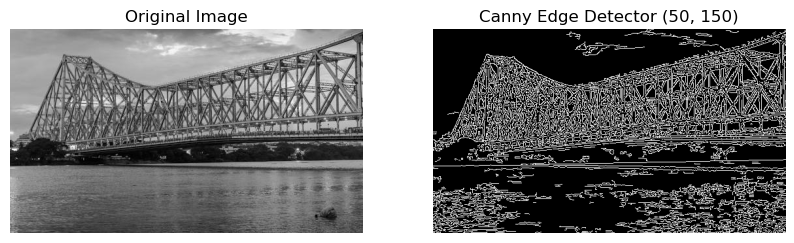

QSocketNotifier: Can only be used with threads started with QThread


In [13]:
import cv2
import numpy as np

# Load the image in grayscale
image = cv2.imread("bridge.jpeg", cv2.IMREAD_GRAYSCALE)

# Function to update Canny thresholds dynamically
def apply_canny(val):
    low_threshold = cv2.getTrackbarPos("Low Threshold", "Canny Edge Detection")
    high_threshold = cv2.getTrackbarPos("High Threshold", "Canny Edge Detection")
    
    # Apply Canny edge detection with updated thresholds
    edges = cv2.Canny(image, low_threshold, high_threshold)
    
    # Show the updated edge-detected image
    cv2.imshow("Canny Edge Detection", edges)


# Apply Canny edge detection
edges = cv2.Canny(image, 50, 150)  # Adjust thresholds for better edge detection

# Plot original image and its frequency spectrum
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Canny Edge Detector (50, 150)")
plt.imshow(edges, cmap="gray")
plt.axis("off")

plt.show()

# Create a window
cv2.namedWindow("Canny Edge Detection")

# Create trackbars for threshold adjustment
cv2.createTrackbar("Low Threshold", "Canny Edge Detection", 50, 255, apply_canny)
cv2.createTrackbar("High Threshold", "Canny Edge Detection", 150, 255, apply_canny)

# Initial call to apply Canny with default values
apply_canny(0)

# Wait until the user closes the window
cv2.waitKey(0)
cv2.destroyAllWindows()


## Screenshot

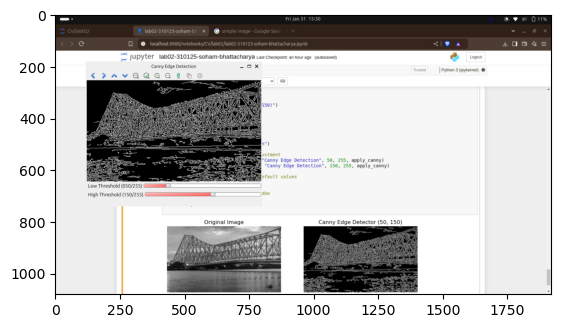

In [10]:
ss = cv2.imread('screenshot.png')
plt.imshow(ss)

# THANK YOU